# Exploratory Data Analysis

In [31]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

print("Project root set.")

Project root set.


In [ ]:
from src.download_data import download
download()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

DATA_PATH = Path("../data/raw/wfp_food_prices_phl.csv")

df = pd.read_csv(DATA_PATH)

df.head()

print("Libraries and data imported.")

Libraries and data imported.


C:\Users\cabre\AppData\Local\Temp\ipykernel_2712\2338242078.py:9: DtypeWarning: Columns (4,5,6,9,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141373 entries, 0 to 141372
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          141373 non-null  object
 1   admin1        141373 non-null  object
 2   admin2        141373 non-null  object
 3   market        141373 non-null  object
 4   market_id     141373 non-null  object
 5   latitude      141373 non-null  object
 6   longitude     141373 non-null  object
 7   category      141373 non-null  object
 8   commodity     141373 non-null  object
 9   commodity_id  141373 non-null  object
 10  unit          141373 non-null  object
 11  priceflag     141373 non-null  object
 12  pricetype     141373 non-null  object
 13  currency      141373 non-null  object
 14  price         141373 non-null  object
 15  usdprice      141373 non-null  object
dtypes: object(16)
memory usage: 17.3+ MB


In [ ]:
# Filter to cebu only
cebu = df[
    df["admin2"].str.lower().str.contains("cebu", na=False)
].copy()

cebu["date"] = pd.to_datetime(cebu["date"])
cebu = cebu.sort_values("date")

cebu["date"] = pd.to_datetime(cebu["date"], errors="coerce")
cebu["price"] = pd.to_numeric(cebu["price"], errors="coerce")
cebu = cebu.dropna(subset=["date", "price"])
cebu = cebu.sort_values("date")


cebu.head()


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
11,2000-01-15,Region VII,Cebu,Cebu City,176,10.31,123.89,cereals and tubers,Maize flour (white),134,KG,actual,Retail,PHP,14.90,0.37
12,2000-01-15,Region VII,Cebu,Cebu City,176,10.31,123.89,cereals and tubers,Maize flour (white),134,KG,actual,Wholesale,PHP,13.60,0.34
13,2000-01-15,Region VII,Cebu,Cebu City,176,10.31,123.89,cereals and tubers,"Rice (milled, superior)",593,KG,actual,Retail,PHP,19.60,0.48
14,2000-01-15,Region VII,Cebu,Cebu City,176,10.31,123.89,cereals and tubers,"Rice (regular, milled)",80,KG,actual,Retail,PHP,18.10,0.45
15,2000-01-15,Region VII,Cebu,Cebu City,176,10.31,123.89,"meat, fish and eggs",Meat (pork),140,KG,actual,Retail,PHP,99.77,2.46


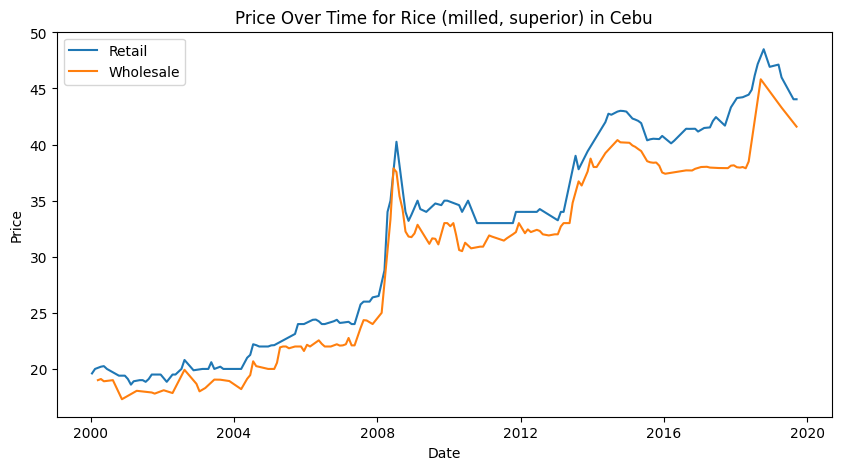

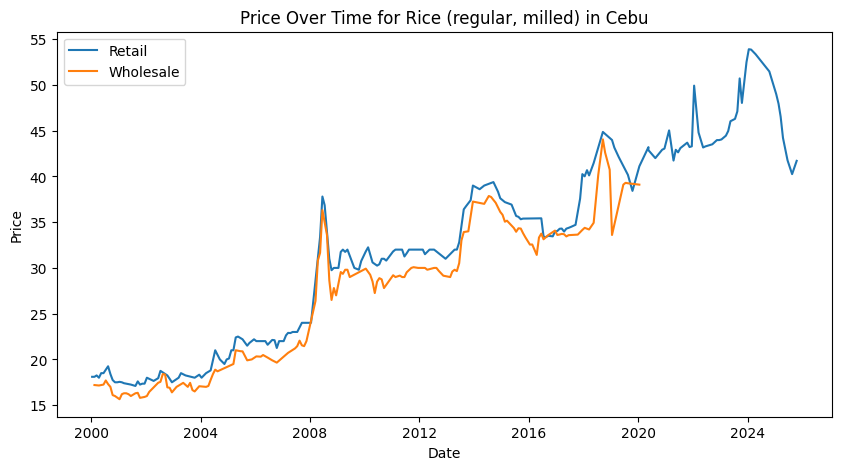

No data for Rice (premium) - Wholesale


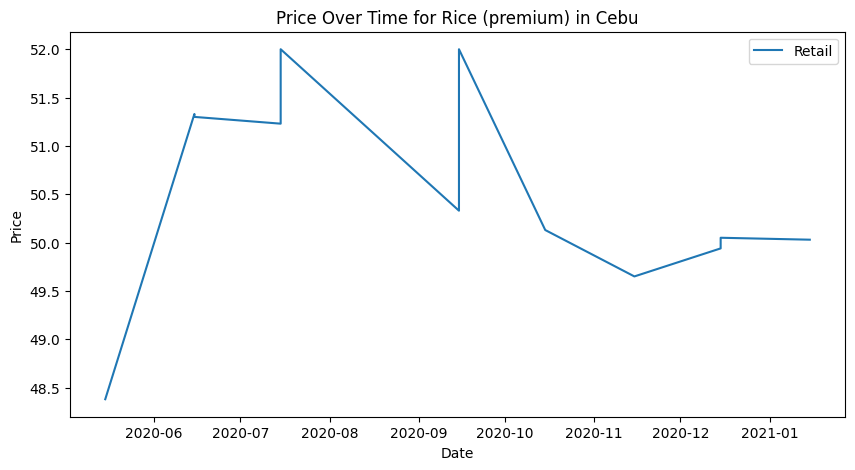

No data for Rice (special) - Wholesale


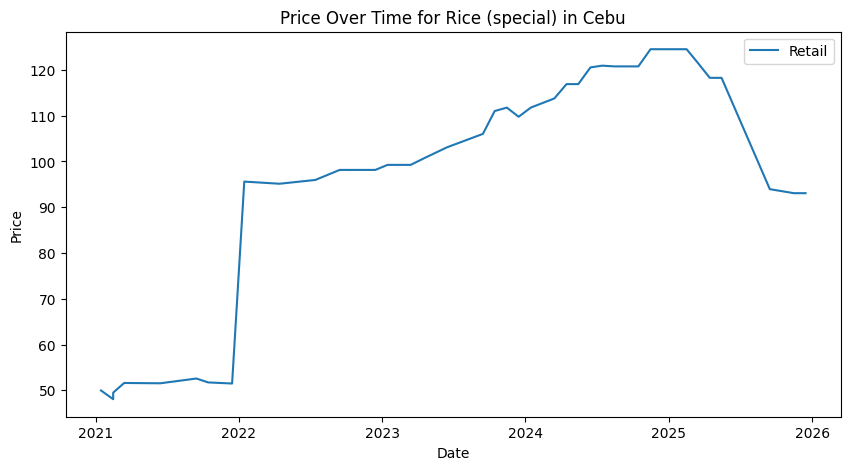

No data for Rice (well milled) - Wholesale


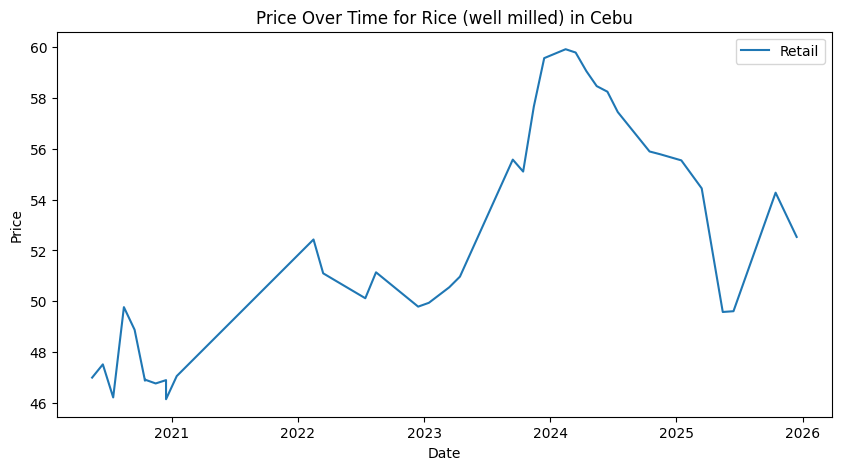

In [ ]:
commodities = [
    "Rice (milled, superior)",
    "Rice (regular, milled)",
    "Rice (premium)",
    "Rice (special)",
    "Rice (well milled)"
]

price_types = [
    "Retail",
    "Wholesale"
]

for commodity in commodities:
    for price_type in price_types:
        subset = cebu[
            (cebu["commodity"] == commodity) &
            (cebu["pricetype"] == price_type)
        ]

        if subset.empty:
            print(f"No data for {commodity} - {price_type}")
            continue

        plt.plot(subset["date"], subset["price"], label=f"{price_type}")

    plt.title(f"Price Over Time for {commodity} in Cebu")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

## Insight:

The only feasible data to use here is Retail prices of Rice (regular, milled)

Even then, that data is not consistently updated monthly, and has some gaps that are 3-5 months wide. Linear interpolation is still necessary.